In [1]:
import numpy as np 
import pandas as pd

from sklearn.datasets import load_boston # our dataset

# for visualization
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
import seaborn as sns

# for splitting our data to train and test
from sklearn.model_selection import train_test_split

#for scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer

# model building
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# for calculating performance
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

#### Loading Data

In [2]:
data=load_boston()

In [3]:
df=pd.DataFrame(data['data'])

In [4]:
df.columns=data['feature_names']

In [5]:
df['Target']=data['target']

#### Top 5 rows

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Shape of our data

In [7]:
df.shape

(506, 14)

#### Insight of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Visualization

<AxesSubplot:xlabel='Target', ylabel='Density'>

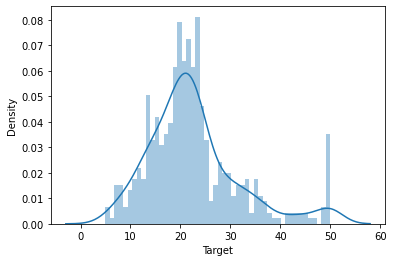

In [10]:
sns.distplot(df['Target'],bins=50)

#### Understanding relationship between two variables using pairplot.

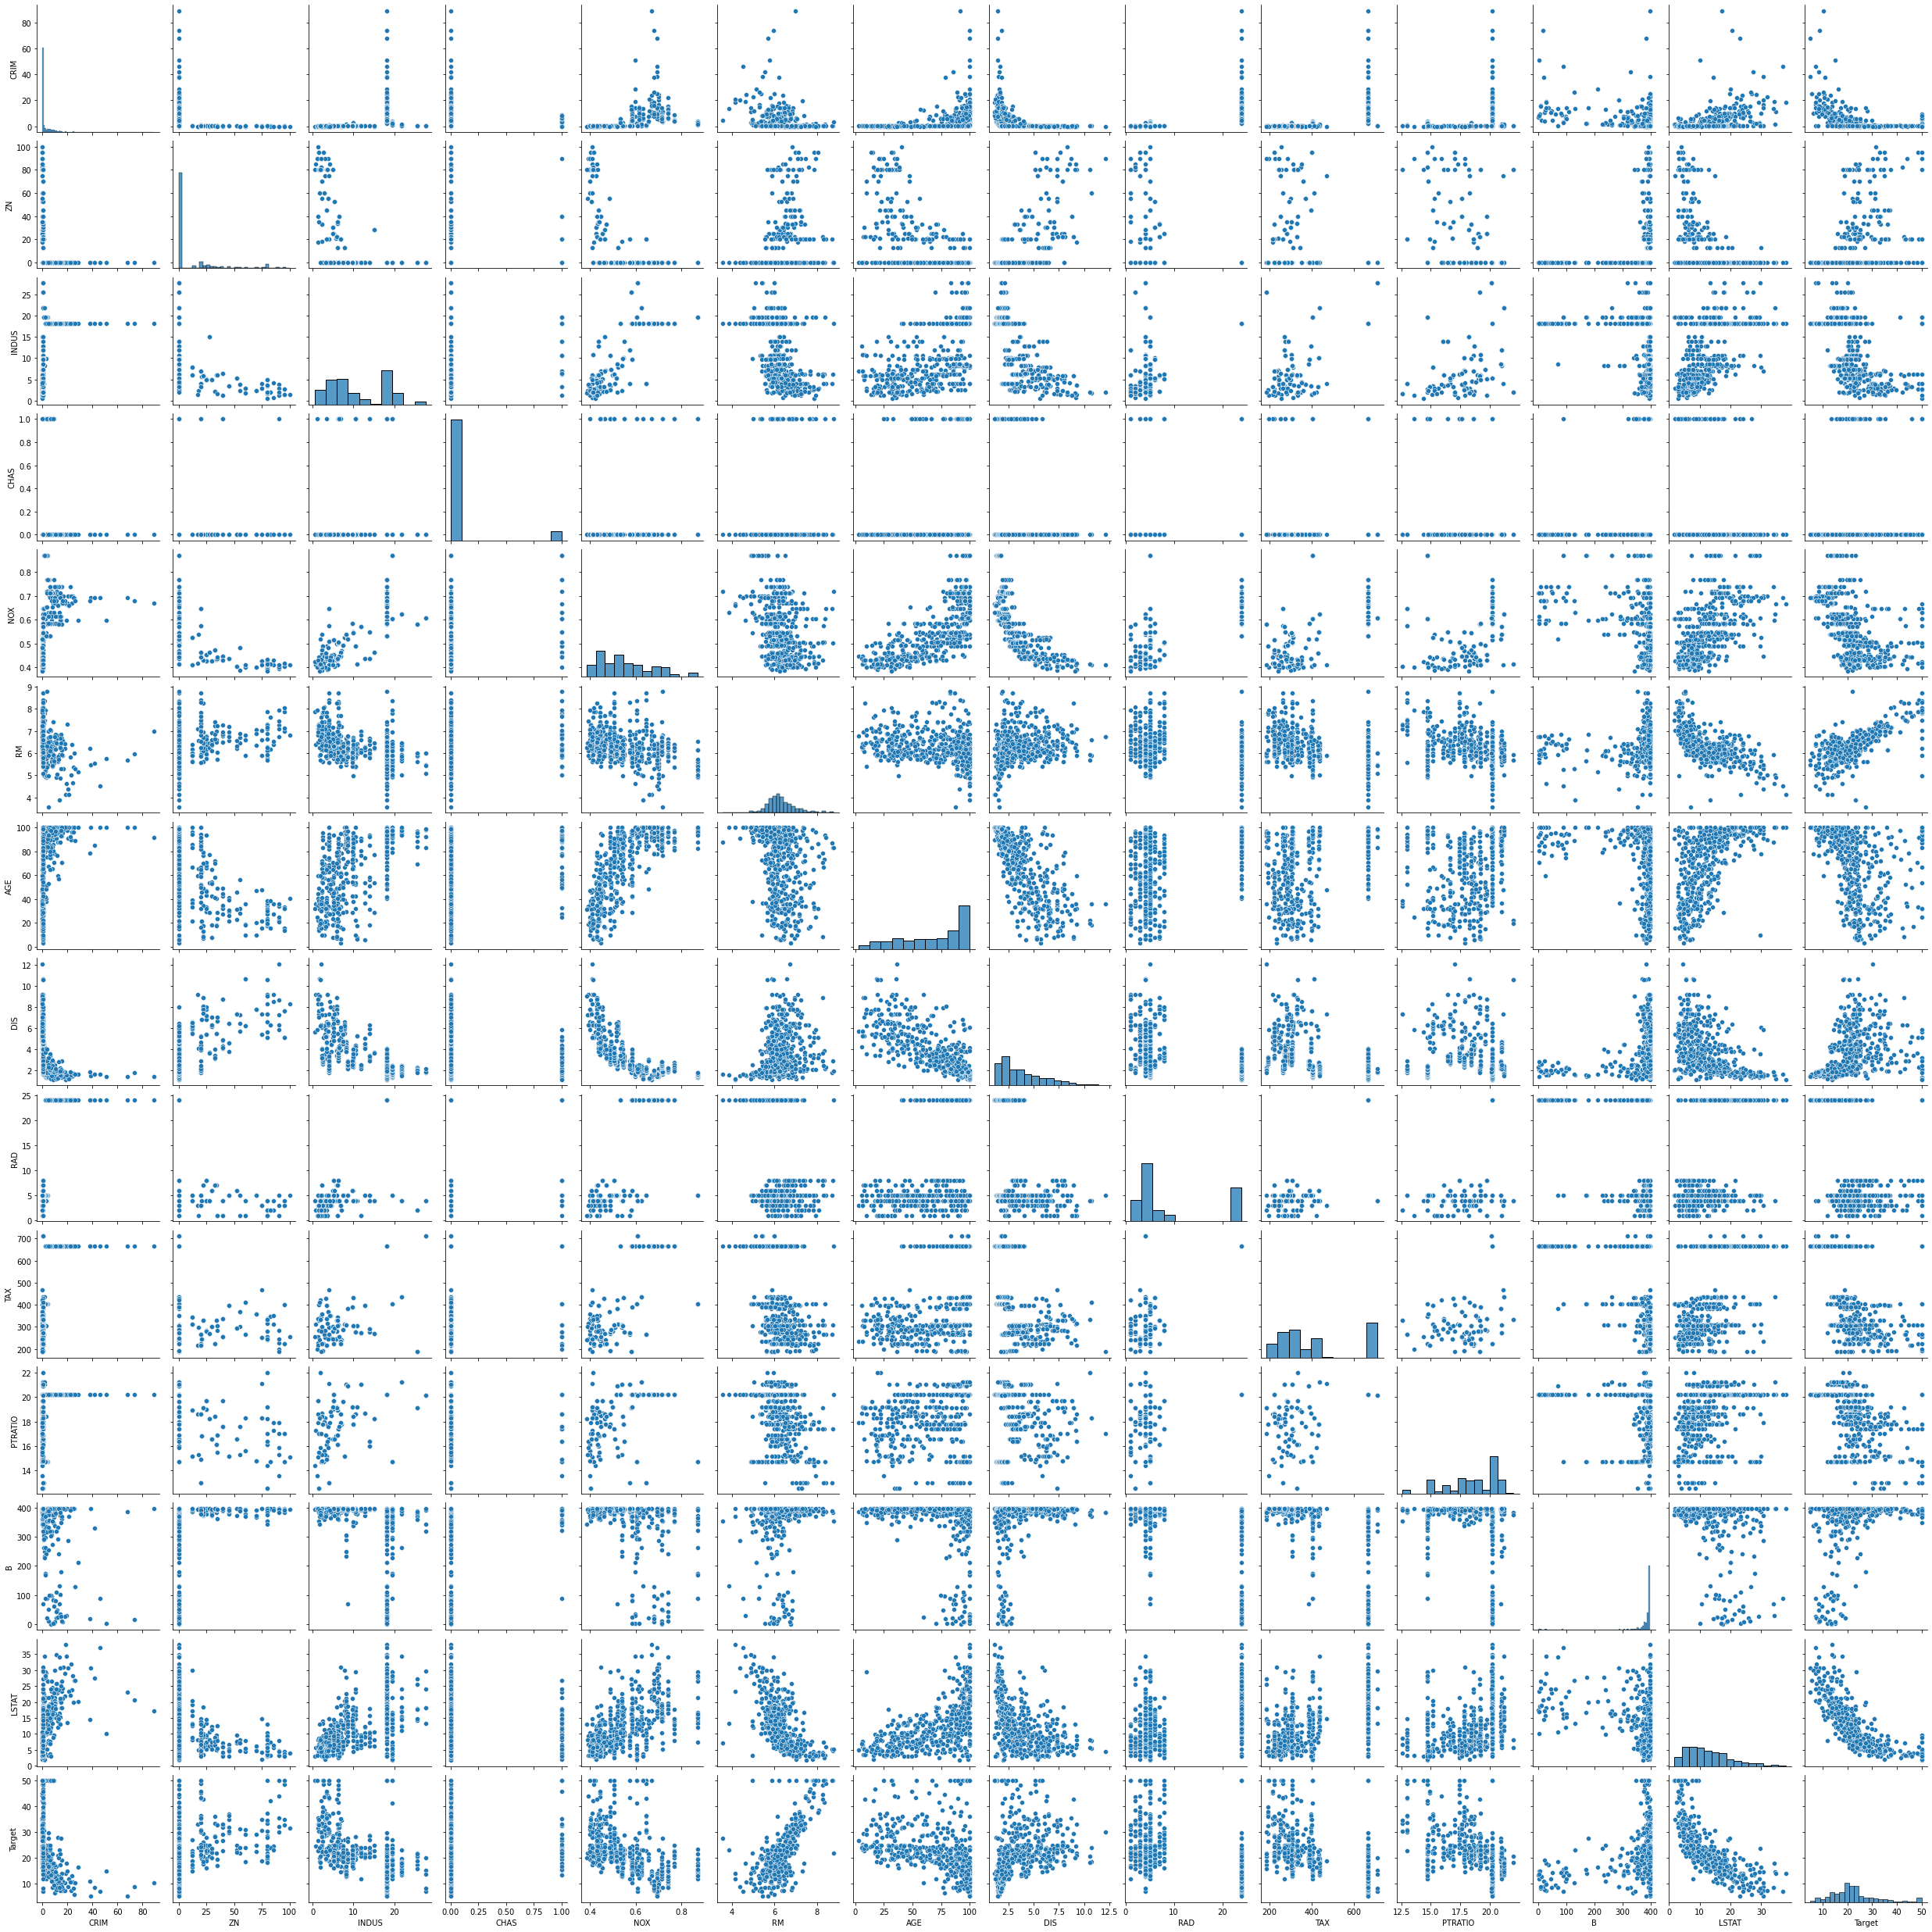

In [11]:
sns.pairplot(df)

<AxesSubplot:>

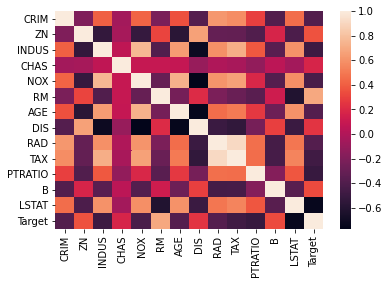

In [12]:
sns.heatmap(df.corr())

##### """From above we can see that TAX and RAD is highly Correlated"""

In [13]:
df['TAX'].corr(df['RAD'])

0.9102281885331835

In [14]:
df['B'].corr(df['Target'])

0.3334608196570666

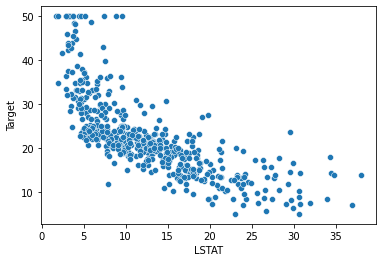

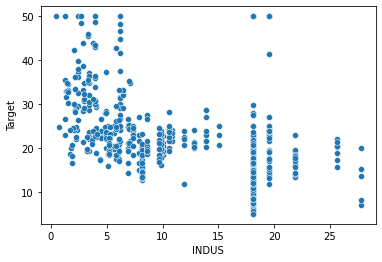

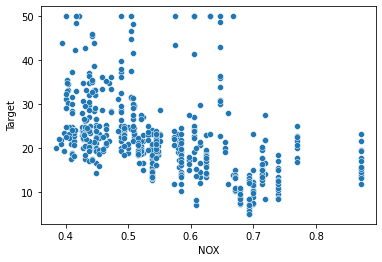

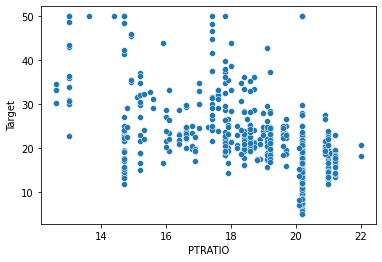

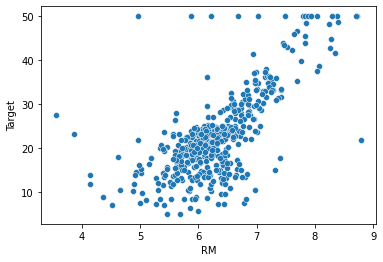

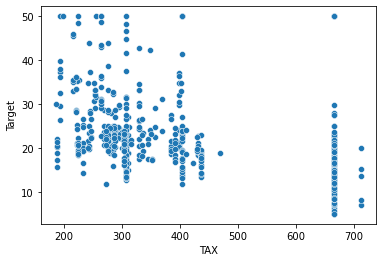

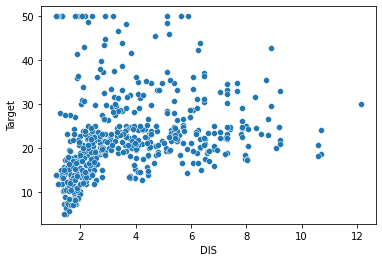

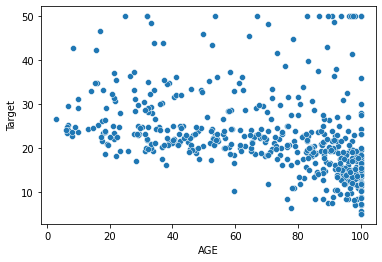

In [15]:
columns=['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
for i in columns:
    sns.scatterplot(y=df.iloc[:,-1],x=df[i])
    plt.show()

#### Seperating Input and Output Column

In [16]:
X=df.iloc[:,:13]
y=df.iloc[:,-1]

In [17]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#### Detection of Outliers

##### QQplot

In [18]:
def plot(X,feature):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    X[feature].plot(kind='kde')
    plt.subplot(1,2,2)
    stats.probplot(X[feature],dist='norm',plot=pylab)

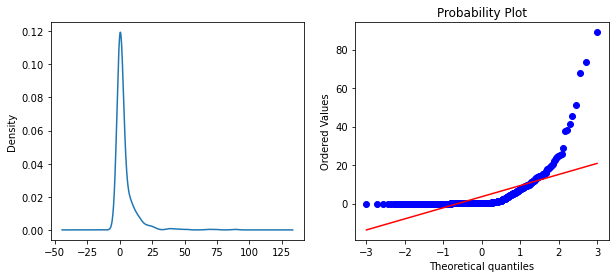

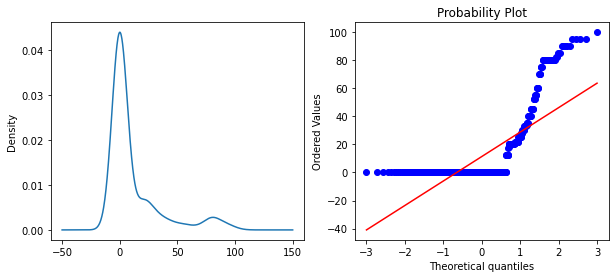

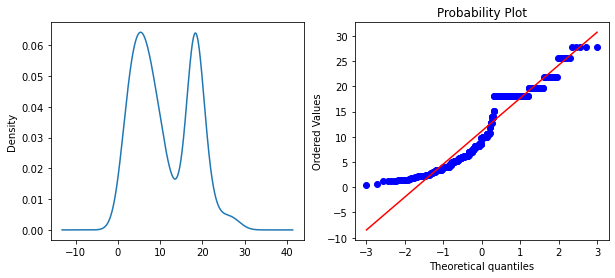

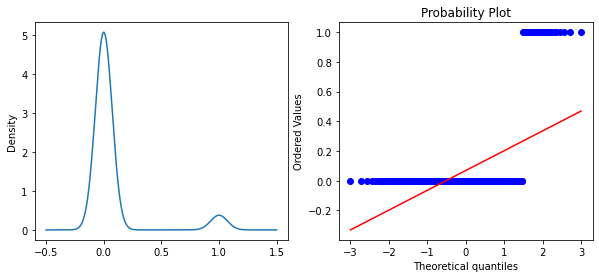

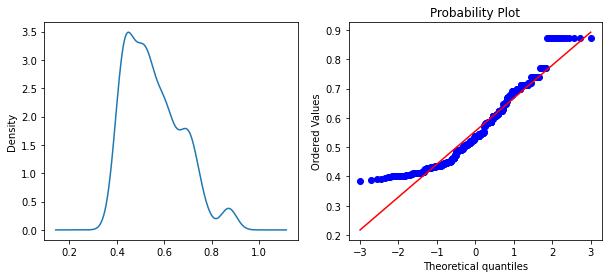

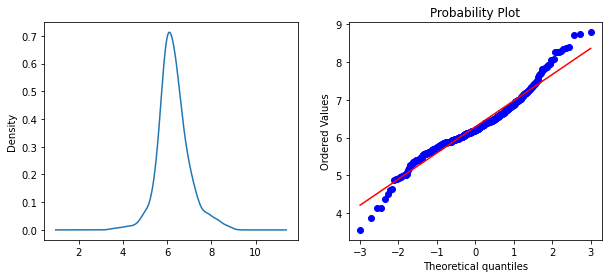

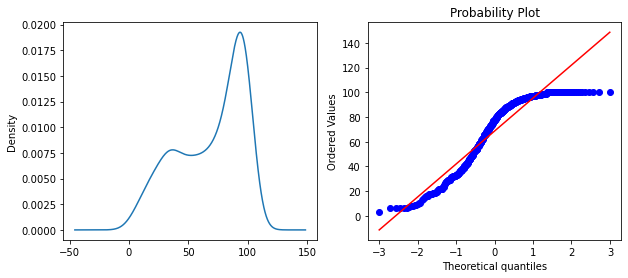

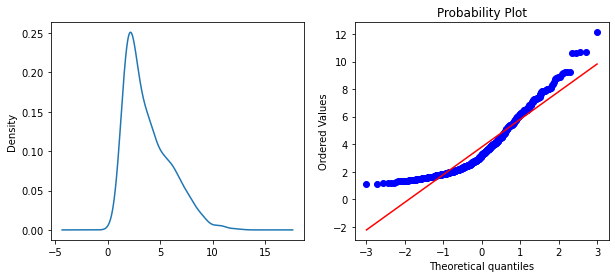

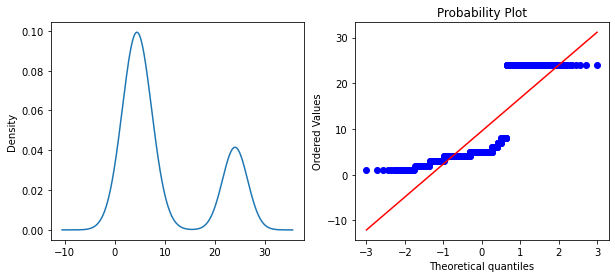

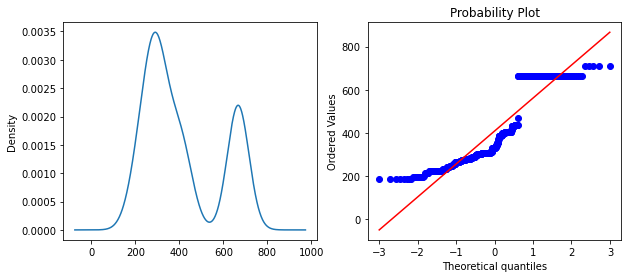

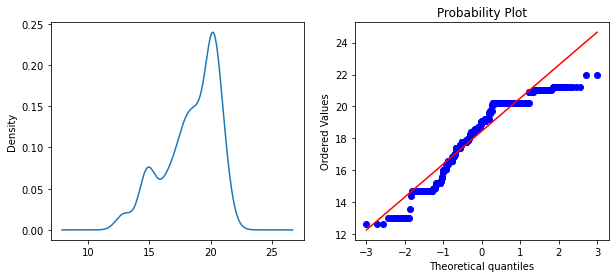

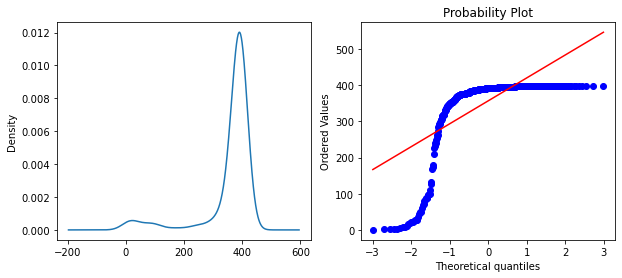

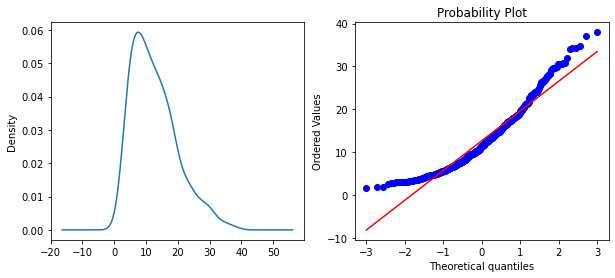

In [19]:
for i in X.columns:
    plot(X,i)

### Normalizing Data

### Using MinMax

In [20]:
scaler=MinMaxScaler()

In [21]:
# x_scaled=scaler.fit_transform(X)
for i in X.columns:
    X[i]=scaler.fit_transform(X[[i]])

In [22]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


#### Splitting Data into training and testing data

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
Model=['Logistic Regression','KNN','SVM','DecisionTree','RandomForest'] #for storing model
Score_mm=[]
r2score_mm=[]

#### LinearRegression

In [26]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [27]:
# score
Score_mm.append(lr.score(xtrain,ytrain))

In [28]:
# r2_score
ypred=lr.predict(xtest)
r2score_mm.append(r2_score(ytest,ypred))

#### KNeighborsRegressor

In [29]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [30]:
Score_mm.append(knn.score(xtrain,ytrain))

In [31]:
ypred1=knn.predict(xtest)
r2score_mm.append(r2_score(ytest,ypred1))

#### Support Vector Machine

In [32]:
svr=SVR()
svr.fit(xtrain,ytrain)
Score_mm.append(svr.score(xtrain,ytrain))
ypred2=svr.predict(xtest)
r2score_mm.append(r2_score(ytest,ypred2))

#### DecisionTreeRegressor

In [33]:
dtc=DecisionTreeRegressor()
dtc.fit(xtrain,ytrain)
Score_mm.append(dtc.score(xtrain,ytrain))
ypred3=dtc.predict(xtest)
r2score_mm.append(r2_score(ytest,ypred3))

#### RandomForestRegressor

In [34]:
rfc=RandomForestRegressor()
rfc.fit(xtrain,ytrain)
Score_mm.append(rfc.score(xtrain,ytrain))
ypred4=rfc.predict(xtest)
r2score_mm.append(r2_score(ytest,ypred4))

In [35]:
Score_mm

[0.7434997532004697,
 0.8198992669661189,
 0.6069189689366998,
 1.0,
 0.9782618608007421]

### Using PowerTransformer

In [36]:
X=df.iloc[:,:13]
y=df.iloc[:,-1]

In [37]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [38]:
scaler=PowerTransformer(method='box-cox')

In [39]:
# x_scaled=scaler.fit_transform(X)
for i in X.columns:
    X[i]=scaler.fit_transform(X[[i]]+0.00000001)

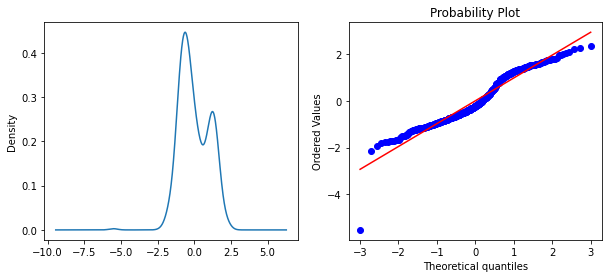

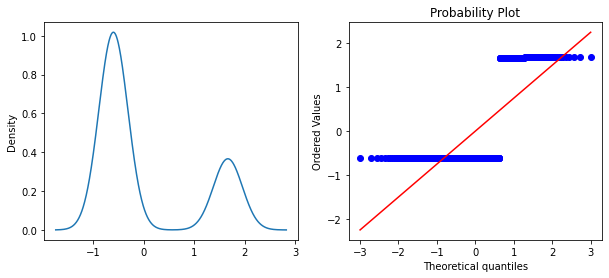

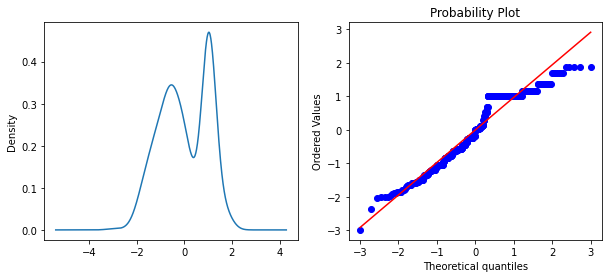

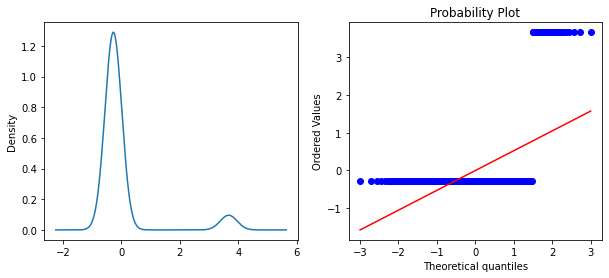

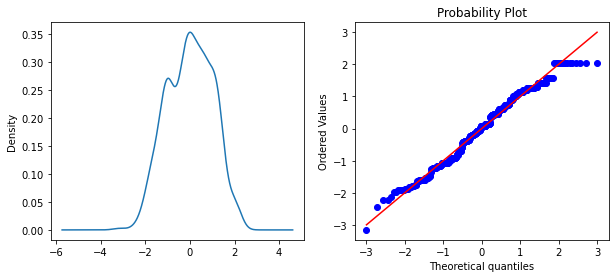

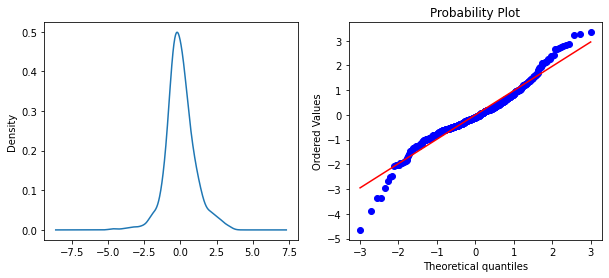

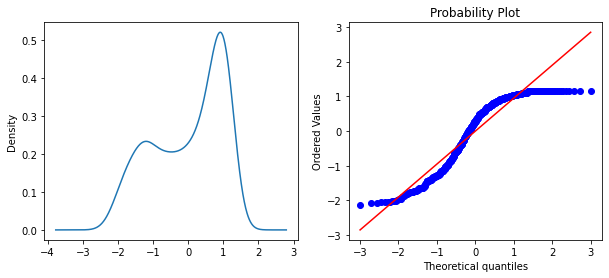

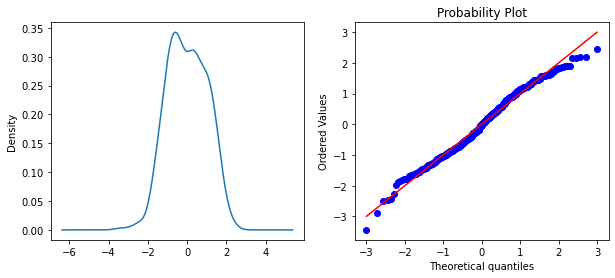

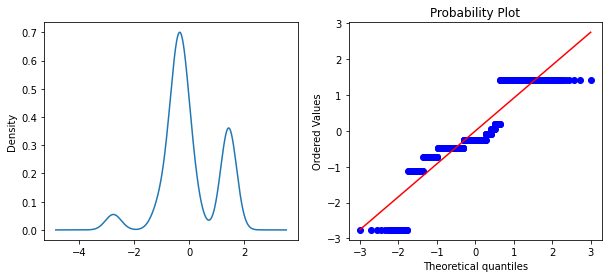

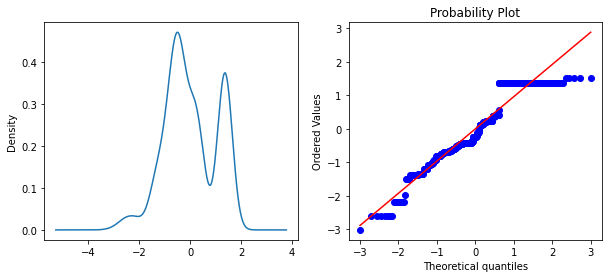

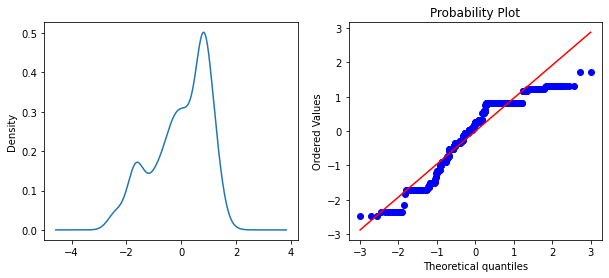

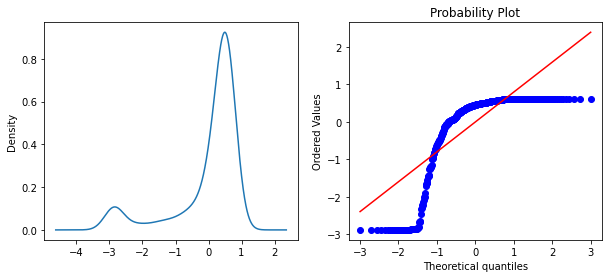

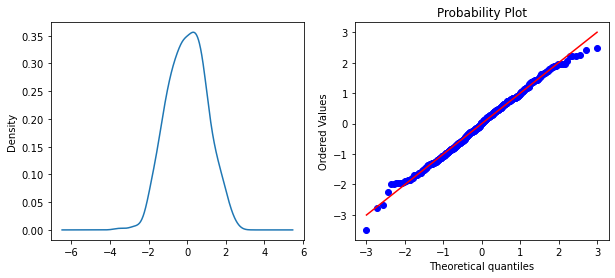

In [40]:
for i in X.columns:
    plot(X,i)

#### displaying the distribution of data based on a five number summary

CRIM


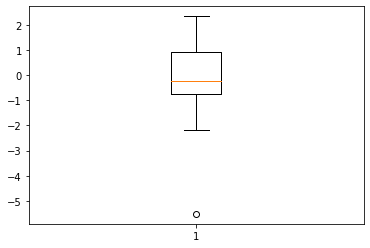

ZN


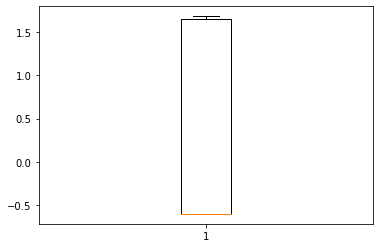

INDUS


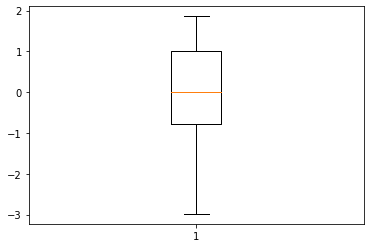

CHAS


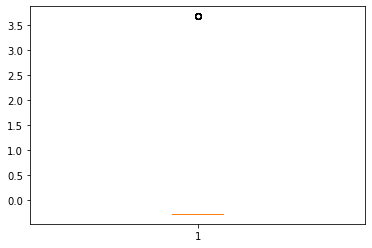

NOX


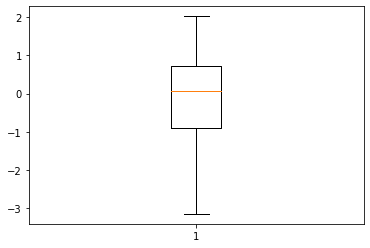

RM


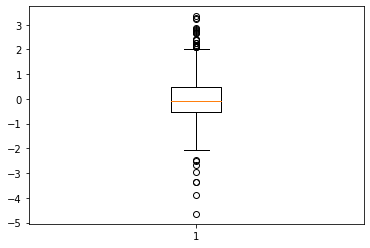

AGE


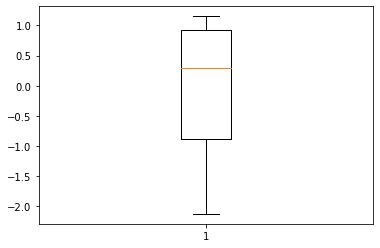

DIS


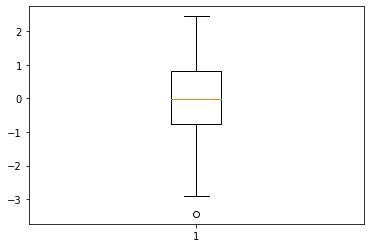

RAD


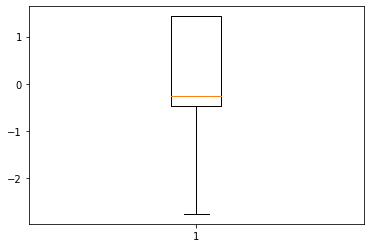

TAX


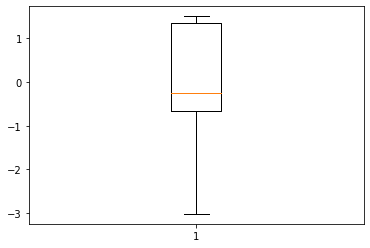

PTRATIO


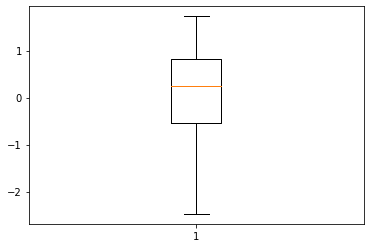

B


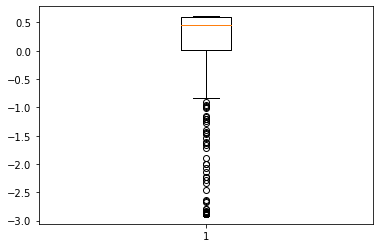

LSTAT


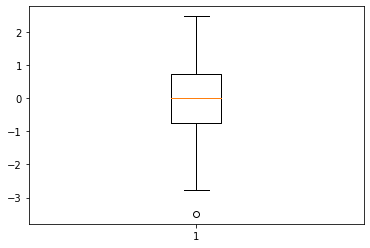

In [41]:
for i in X.columns:
    print(i)
    plt.boxplot(X[i])
#     sns.boxplot(X[i])
    plt.show()

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [43]:
score_bxcx=[]
r2score_bxcx=[]

#### LinearRegression

In [44]:
lr=LinearRegression() #creatring Linear Regression Object
lr.fit(xtrain,ytrain) # fit train data on Regresion Model
score_bxcx.append(lr.score(xtrain,ytrain))
ypred=lr.predict(xtest) # predicting target for test data
r2score_bxcx.append(r2_score(ytest,ypred)) # r2_score

#### KNeighborsRegressor

In [45]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain,ytrain)
score_bxcx.append(knn.score(xtrain,ytrain))
ypred2=knn.predict(xtest)
r2score_bxcx.append(r2_score(ytest,ypred))

#### SVM

In [46]:
svr=SVR()
svr.fit(xtrain,ytrain)
score_bxcx.append(svr.score(xtrain,ytrain))
ypred3=svr.predict(xtest)
r2score_bxcx.append(r2_score(ytest,ypred3))

#### DecisionTreeRegressor

In [47]:
dtc=DecisionTreeRegressor()
dtc.fit(xtrain,ytrain)
score_bxcx.append(dtc.score(xtrain,ytrain))
ypred4=dtc.predict(xtest)
r2score_bxcx.append(r2_score(ytest,ypred4))

#### RandomForestRegressor

In [48]:
rfc=RandomForestRegressor()
rfc.fit(xtrain,ytrain)
score_bxcx.append(rfc.score(xtrain,ytrain))
ypred5=rfc.predict(xtest)
r2score_bxcx.append(r2_score(ytest,ypred5))

#### Score

In [49]:
Score_mm

[0.7434997532004697,
 0.8198992669661189,
 0.6069189689366998,
 1.0,
 0.9782618608007421]

In [50]:
score_bxcx

[0.7912842096903565,
 0.8466129959774964,
 0.6782406145473494,
 1.0,
 0.9771983241788788]

#### r2_score

In [51]:
r2score_mm

[0.7112260057484925,
 0.7103254154789389,
 0.6248887017114004,
 0.7948753361039829,
 0.8751472226897594]

In [52]:
r2score_bxcx

[0.7681182830797442,
 0.7681182830797442,
 0.6885137815394302,
 0.8304192471698304,
 0.8545825001201243]

In [53]:
Model

['Logistic Regression', 'KNN', 'SVM', 'DecisionTree', 'RandomForest']

#### Comparision By creating a Dataframe

In [54]:
final=pd.DataFrame({'Score_mm':Score_mm,'r2score_mm':r2score_mm,'score_bxcx':score_bxcx,'r2score_bxcx':r2score_bxcx},index=Model)
final

,Score_mm,r2score_mm,score_bxcx,r2score_bxcx
Logistic Regression,0.743500,0.711226,0.791284,0.768118
KNN,0.819899,0.710325,0.846613,0.768118
SVM,0.606919,0.624889,0.678241,0.688514
DecisionTree,1.000000,0.794875,1.000000,0.830419
RandomForest,0.978262,0.875147,0.977198,0.854583


##### Coclusion: RandomForestRegressor is giving Best Performances (score and r2_score) on MinMax Scaling.

In [55]:
final.loc['RandomForest'][['Score_mm','r2score_mm']]

Score_mm      0.978262
r2score_mm    0.875147
Name: RandomForest, dtype: float64

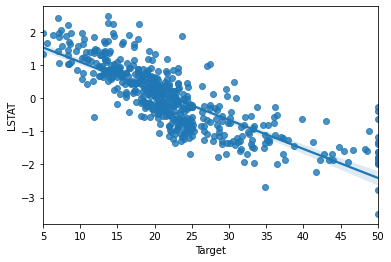

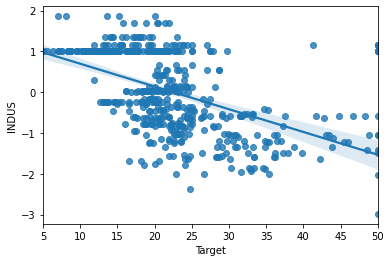

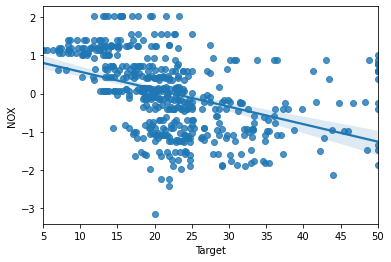

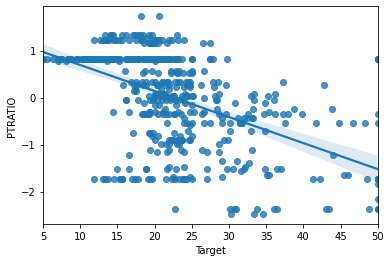

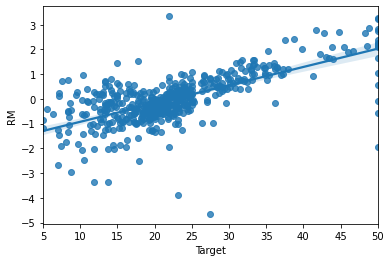

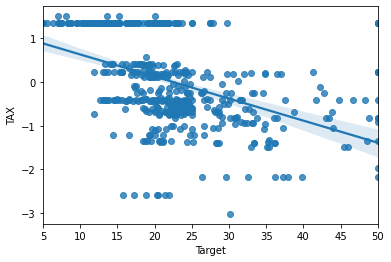

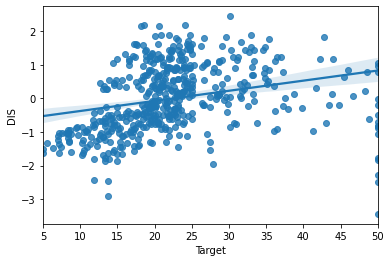

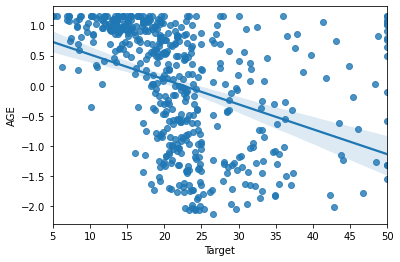

In [56]:
columns=['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
for i in columns:
    sns.regplot(x=df.iloc[:,-1],y=df[i])
    plt.show()